In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:

df=pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [3]:
#Preview the data and check if it was loaded correctly.
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50134858,IPIZZANY,Manhattan,3801,BROADWAY,10032.0,6463441533,NaN,01/01/1900,NaN,...,NaN,40.834774,-73.944366,112.0,7.0,24700.0,1063301.0,1.021360e+09,MN36,NaN
1,50131923,NaN,Brooklyn,445,ALBEE SQUARE,11201.0,9175493308,NaN,01/01/1900,NaN,...,NaN,40.690826,-73.983452,302.0,33.0,1500.0,3397861.0,3.001498e+09,BK38,NaN
2,50134227,NaN,Manhattan,34,WEST 32 STREET,10001.0,6149378003,NaN,01/01/1900,NaN,...,NaN,40.747819,-73.987101,105.0,4.0,7600.0,1015832.0,1.008330e+09,MN17,NaN
3,50130429,NaN,Staten Island,418,FOREST AVENUE,10301.0,6467788883,NaN,01/01/1900,NaN,...,NaN,40.630829,-74.103347,501.0,49.0,5900.0,5006981.0,5.002530e+09,SI35,NaN
4,50123241,NaN,Queens,136-20,ROOSEVELT AVENUE,11354.0,3479232008,NaN,01/01/1900,NaN,...,NaN,40.759778,-73.829235,407.0,20.0,85300.0,4113546.0,4.050190e+09,QN22,NaN


In [4]:
#Check the information about the dataframe
df.info

<bound method DataFrame.info of            CAMIS                         DBA           BORO BUILDING  \
0       50134858                    IPIZZANY      Manhattan     3801   
1       50131923                         NaN       Brooklyn      445   
2       50134227                         NaN      Manhattan       34   
3       50130429                         NaN  Staten Island      418   
4       50123241                         NaN         Queens   136-20   
...          ...                         ...            ...      ...   
204861  50107111                   CHIP CITY         Queens     4505   
204862  50071004                      SPOONS       Brooklyn     5001   
204863  50071419           MIN JIANG MEI SHI       Brooklyn     5820   
204864  50055392  BRAVO AFRICAN RESTAURANT 2          Bronx     3744   
204865  50109809           EL SHADDAI EATERY       Brooklyn     1010   

                   STREET  ZIPCODE       PHONE       CUISINE DESCRIPTION  \
0                BROADWAY  

In [5]:
#Check number of rows and columns in the dataframe
df.shape

(204866, 27)

In [6]:
len(df.index)

204866

I have analyzed that the dataset has a large number of rows and columns. To achieve the best results, let's narrow down the dataset to only include the year "2021" (just after the end of the COVID pandemic) and analyze how many restaurant violations are still critical in New York.

In [7]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

# Filter the dataframe to keep only records for 2021
df2 = df[df['INSPECTION DATE'].dt.year == 2021].copy()

In [8]:
df2

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
66,40931583,CONNECTICUT MUFFIN,Brooklyn,423,MYRTLE AVENUE,11205.0,7189350087,Coffee/Tea,2021-08-19,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.693137,-73.968667,302.0,35.0,19100.0,3054300.0,3.018880e+09,BK69,NaN
85,50089838,CAFE DE COLOMBIA BAKERY,Queens,8303,37TH AVE,11372.0,7182163623,Bakery Products/Desserts,2021-08-18,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.749863,-73.883229,403.0,25.0,28100.0,4035828.0,4.014570e+09,QN28,NaN
180,50070762,DONNA'S DUTCH POT,Brooklyn,1073,LIBERTY AVENUE,11208.0,3474067388,Caribbean,2021-11-18,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.678339,-73.869600,305.0,37.0,119000.0,3093582.0,3.041710e+09,BK83,NaN
204,40553581,BOSTON MARKET,Bronx,337185,EAST TREMONT AVENUE,NaN,7188240440,Chicken,2021-08-04,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
236,40391498,PEKING RESTAURANT,Queens,5811,WOODSIDE AVENUE,11377.0,7186721414,Chinese,2021-07-19,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.745597,-73.906287,402.0,26.0,25900.0,4028290.0,4.012290e+09,QN63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204835,41513756,GREAT WALL RESTAURANT,Bronx,1179,PUGSLEY AVENUE,10472.0,7188920256,Chinese,2021-09-01,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.830721,-73.857080,209.0,18.0,7200.0,2025817.0,2.037920e+09,BX55,NaN
204842,40423705,ZARO'S BAKERY,Manhattan,89,EAST 42 STREET,10017.0,2123767619,American,2021-07-23,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.752094,-73.977604,105.0,4.0,9200.0,1035381.0,1.012800e+09,MN19,NaN
204846,41559805,DUNKIN,Brooklyn,640,SOUTH CONDUIT BOULEVARD,11208.0,3478733086,Donuts,2021-08-25,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.675675,-73.866069,305.0,42.0,120000.0,3095219.0,3.042390e+09,BK82,NaN
204856,50105348,NEW UP UP RESTAURANT,Brooklyn,5623,8 AVENUE,11220.0,9173096992,Chinese,2021-10-14,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.637570,-74.007375,312.0,38.0,10400.0,3139839.0,3.056860e+09,BK34,NaN


In [9]:

df2.to_csv('DOHMH_New_York_City_Restaurant_Inspection_Results_2021.csv', index=False)

In [10]:

df2 = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results_2021.csv")

In [11]:
#To view the list of column labels
df2.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

To predict the violation conditions, we will use the important columns "violation description" and "critical flag".

In [12]:
#Take the required column
dfx=df2[["VIOLATION DESCRIPTION","CRITICAL FLAG"]]
dfx

,VIOLATION DESCRIPTION,CRITICAL FLAG
0,NaN,Not Applicable
1,Hot food item not held at or above 140º F.,Critical
2,Hot food item not held at or above 140º F.,Critical
3,Food Protection Certificate not held by superv...,Critical
4,Thawing procedures improper.,Not Critical
...,...,...
21709,Hot food item not held at or above 140º F.,Critical
21710,Cold food item held above 41º F (smoked fish a...,Critical
21711,Filth flies or food/refuse/sewage-associated (...,Critical
21712,Facility not vermin proof. Harborage or condit...,Not Critical


In [13]:
#Drops any rows with missing values in the VIOLATION DESCRIPTION column and  rows where the CRITICAL FLAG is not "Not Applicable"
dc=dfx.dropna(subset=["VIOLATION DESCRIPTION"]) \
         .query('`CRITICAL FLAG` != "Not Applicable"')
dc

,VIOLATION DESCRIPTION,CRITICAL FLAG
1,Hot food item not held at or above 140º F.,Critical
2,Hot food item not held at or above 140º F.,Critical
3,Food Protection Certificate not held by superv...,Critical
4,Thawing procedures improper.,Not Critical
5,Hot food item not held at or above 140º F.,Critical
...,...,...
21709,Hot food item not held at or above 140º F.,Critical
21710,Cold food item held above 41º F (smoked fish a...,Critical
21711,Filth flies or food/refuse/sewage-associated (...,Critical
21712,Facility not vermin proof. Harborage or condit...,Not Critical


In [14]:
dc["VIOLATION DESCRIPTION"]

1               Hot food item not held at or above 140º F.
2               Hot food item not held at or above 140º F.
3        Food Protection Certificate not held by superv...
4                             Thawing procedures improper.
5               Hot food item not held at or above 140º F.
                               ...                        
21709           Hot food item not held at or above 140º F.
21710    Cold food item held above 41º F (smoked fish a...
21711    Filth flies or food/refuse/sewage-associated (...
21712    Facility not vermin proof. Harborage or condit...
21713    Plumbing not properly installed or maintained;...
Name: VIOLATION DESCRIPTION, Length: 21465, dtype: object

Convert the data type of violation description to string type.

In [15]:
dc['VIOLATION DESCRIPTION'] = dc['VIOLATION DESCRIPTION'].astype(str)

In [16]:
dc["VIOLATION DESCRIPTION"]

1               Hot food item not held at or above 140º F.
2               Hot food item not held at or above 140º F.
3        Food Protection Certificate not held by superv...
4                             Thawing procedures improper.
5               Hot food item not held at or above 140º F.
                               ...                        
21709           Hot food item not held at or above 140º F.
21710    Cold food item held above 41º F (smoked fish a...
21711    Filth flies or food/refuse/sewage-associated (...
21712    Facility not vermin proof. Harborage or condit...
21713    Plumbing not properly installed or maintained;...
Name: VIOLATION DESCRIPTION, Length: 21465, dtype: object

In [17]:
## Removing the punctuations if an missed by above process
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~º'''
    for i in string:
        if i in punc:
            string = string.replace(i,"")
    return string
dc['VIOLATION DESCRIPTION'] = dc['VIOLATION DESCRIPTION'].apply(remove_punc) 

Split the data into training and testing sets using the train_test_split function from scikit-learn.


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=dc["VIOLATION DESCRIPTION"]
X

1                 Hot food item not held at or above 140 F
2                 Hot food item not held at or above 140 F
3        Food Protection Certificate not held by superv...
4                              Thawing procedures improper
5                 Hot food item not held at or above 140 F
                               ...                        
21709             Hot food item not held at or above 140 F
21710    Cold food item held above 41 F smoked fish and...
21711    Filth flies or foodrefusesewageassociated FRSA...
21712    Facility not vermin proof Harborage or conditi...
21713    Plumbing not properly installed or maintained ...
Name: VIOLATION DESCRIPTION, Length: 21465, dtype: object

In [20]:
y=dc["CRITICAL FLAG"]

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [22]:
X_train.shape

(15025,)

In [23]:
X_test.shape

(6440,)

In [24]:
X_train.dtypes

dtype('O')

In [25]:
#Import the necessary Libaries
from sklearn.feature_extraction.text import TfidfVectorizer


Transforms the text data in the X_train and X_test variables into word-level TF-IDF (term frequency-inverse document frequency) features using the fit_transform() method of the TfidfVectorizer for the training data and the transform() method for the test data. Finally, it converts the sparse matrix to a dense array using the toarray() method.

In [55]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),max_features=None)
X_train_words = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_words = tfidf_vectorizer.transform(X_test).toarray()


In [27]:
X_train_words

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_train_words.shape

(15025, 429)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

Text(0, 0.5, 'Accuracy')

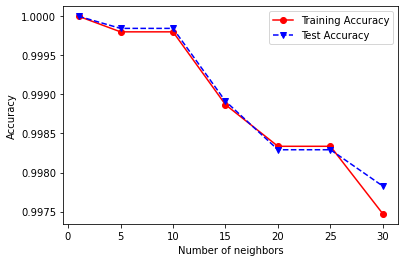

In [30]:
# Hyperparameter tuning for KNN
# Try different values of k and plot the training and test accuracy
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []
# Loop through each value of k
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)# Create KNN classifier with given hyperparameters
    clf.fit(X_train_words, y_train)# Train the classifier
    Y_predTrain = clf.predict(X_train_words)  # Make predictions on the training set
    Y_predTest = clf.predict(X_test_words)  # Make predictions on the test set
    trainAcc.append(accuracy_score(y_train, Y_predTrain))  # Calculate training accuracy and append to list
    testAcc.append(accuracy_score(y_test, Y_predTest))  # Calculate test accuracy and append to list

# Plot the training and test accuracy for each value of k
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,Y_predTest ))

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00      3671
Not Critical       1.00      1.00      1.00      2769

    accuracy                           1.00      6440
   macro avg       1.00      1.00      1.00      6440
weighted avg       1.00      1.00      1.00      6440



In [32]:
accurac=(accuracy_score(y_test, Y_predTest))
accurac

0.9978260869565218

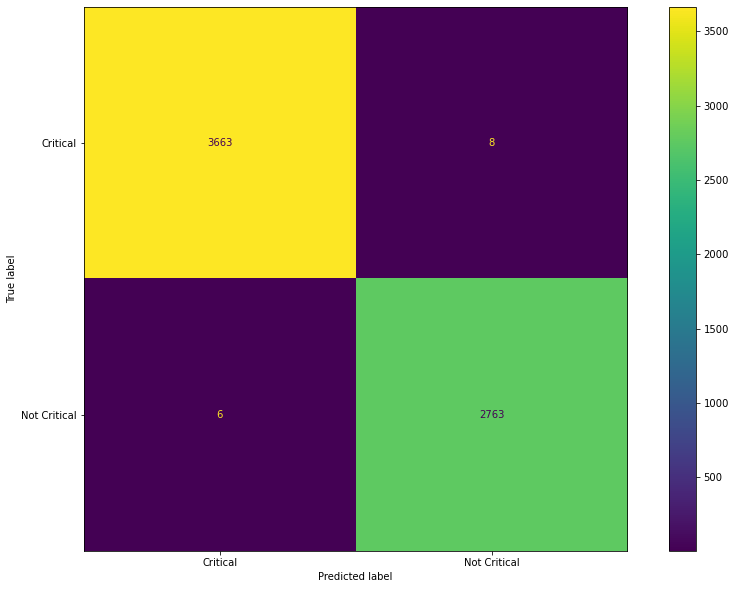

In [33]:
from sklearn import metrics
# Compute confusion matrix and display it as heatmap
cm = metrics.confusion_matrix(y_test, Y_predTest, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp = disp.plot(include_values=True, cmap='viridis', ax=plt.subplots(figsize=(15, 10))[1])


In [34]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Recall = TP / (TP + FN)
Precision = TP / (TP + FP)

F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [35]:
print('KNN recall score is:', metrics.recall_score(y_test, Y_predTest, average='macro'))
recall = 3663 / (3663+8)
print('Manually calculated KNN recall is: ', recall, '\n')

print('KNN precision score is:', metrics.precision_score(y_test, Y_predTest, average='macro'))
precision = 3663 / (3663 + 6)
print('Manually calculated KNN precision is: ', precision, '\n')

print('KNN F1-score is: ', metrics.f1_score(y_test, Y_predTest, average='macro'))
f1_score = (2*precision*recall) / (precision + recall)
print('Manually calculated KNN f1-score is: ', f1_score, '\n')

KNN recall score is: 0.9978269550247865
Manually calculated KNN recall is:  0.9978207572868428 

KNN precision score is: 0.9977388163177023
Manually calculated KNN precision is:  0.9983646770237122 

KNN F1-score is:  0.9977827836197484
Manually calculated KNN f1-score is:  0.9980926430517711 



Now train a Multinomial Naive Bayes classifier on the training data and evaluates its performance on both the training and test data using accuracy scores. 


In [38]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline


The accuracy scores are plotted against the number of neighbors used for classification.

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test,Y_predTest ))

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00      3671
Not Critical       1.00      1.00      1.00      2769

    accuracy                           1.00      6440
   macro avg       1.00      1.00      1.00      6440
weighted avg       1.00      1.00      1.00      6440



In [40]:
accurac=(accuracy_score(y_test, Y_predTest))
accurac

0.9978260869565218

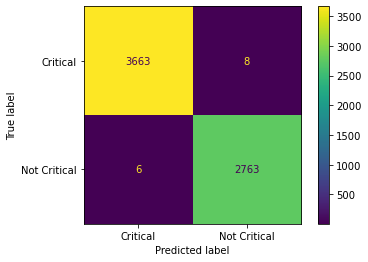

In [41]:
cm = metrics.confusion_matrix(y_test, Y_predTest)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [42]:
print('MultinomialNB recall score is:', metrics.recall_score(y_test, Y_predTest, average='macro'))
recall = 3664 / (3664+4)
print('Manually calculated MultinomialNB recall is: ', recall, '\n')

print('MultinomialNB precision score is:', metrics.precision_score(y_test, Y_predTest, average='macro'))
precision = 3664 / (3664 + 7)
print('Manually calculated MultinomialNB precision is: ', precision, '\n')

print('MultinomialNB F1-score is: ', metrics.f1_score(y_test, Y_predTest, average='macro'))
f1_score = (2*precision*recall) / (precision + recall)
print('Manually calculated MultinomialNB f1-score is: ', f1_score, '\n')

MultinomialNB recall score is: 0.9978269550247865
Manually calculated MultinomialNB recall is:  0.9989094874591058 

MultinomialNB precision score is: 0.9977388163177023
Manually calculated MultinomialNB precision is:  0.9980931626259875 

MultinomialNB F1-score is:  0.9977827836197484
Manually calculated MultinomialNB f1-score is:  0.9985011581959395 



In [49]:
x='''Hot food item not held at or above 140º F.'''

In [50]:
## Removing the punctuations if an missed by above process
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~º'''
    for i in string:
        if i in punc:
            string = string.replace(i,"")
    return string
x = (remove_punc(x)) 

In [51]:
x

'Hot food item not held at or above 140 F'

In [56]:
X_test1 = tfidf_vectorizer.transform([x])

In [57]:
Y_predTest1 = clf.predict(X_test1)  # Make predictions on the test set


In [58]:
Y_predTest1

array(['Critical'], dtype=object)